<a href="https://colab.research.google.com/github/OBertelli/IA-Course/blob/main/Copie_DSA_lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big-O Notation



## Linear time

In [ ]:
# simple hi function

def count(n):   # input size
    count = 0
    for i in range(n):
        count = count + 1
    return count

# time needed to buy tickets

class Queue:
    def __init__(self):
        self.items = []

    def __str__(self):
        return '>>' + str(self.items) + '>>'

    def is_empty(self):
        return self.items == []

    def enqueue(self, item):
        self.items.insert(0,item)

    def dequeue(self):
        return self.items.pop()

    def size(self):
        return len(self.items)


def tn1(tickets, k):
    line = Queue()
    for id, num in enumerate(tickets):
        line.enqueue([id, num])

    time = 0
    while not line.is_empty():
        #print(line)
        time = time + 1
        id, num = line.dequeue()
        if (id == k) and (num == 1):
            return time
        if num > 1:
            line.enqueue([id, num-1])


# valid paranthesis

class Stack:
    def __init__(self):
        self.items = []

    def __str__(self):
        return '||' + str(self.items) + '>>'

    def is_empty(self):
        return self.items == []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[-1]

    def size(self):
        return len(self.items)

def isvalid(s):
    bracketmap = {')':'(', ']':'[', '}':'{'}
    brackets = Stack()

    for c in s:
        if c in bracketmap:     # if c is a closing bracket
            if brackets.is_empty():
                return False
            elif brackets.peek() == bracketmap[c]:
                brackets.pop()
            else:
                brackets.push(c)
        else:                   # if c is an opening bracket
            brackets.push(c)

    if brackets.is_empty():
        return True
    else:
        return False

# two sum

def twoSum2(nums, target):
    h = {}
    l = len(nums)
    for i in range(l):
        diff = target - nums[i]
        if diff in h:
            return [h[diff], i]
        h[nums[i]] = i



Text(0.5, 1.0, 'Running time comparision')

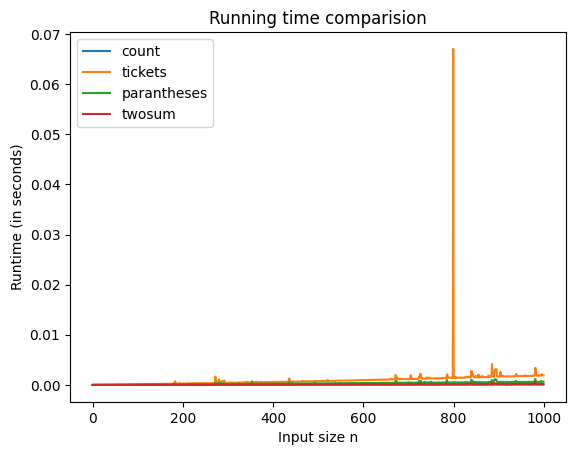

In [ ]:
import matplotlib.pyplot as plt
import time

nmax = 1000

times_count = []
times_tickets = []
times_paranthesis = []
times_twosum = []

for n in range(nmax):

    # generate different inputs for each function

    tickets = [2]*n
    k = n - 1

    s = '('*n + ')'*n

    nums = [i for i in range(n)]
    target = 2*n


    tic = time.time()
    count(n)
    toc = time.time()
    times_count.append(toc-tic)

    tic = time.time()
    tn1(tickets, k)
    toc = time.time()
    times_tickets.append(toc-tic)

    tic = time.time()
    isvalid(s)
    toc = time.time()
    times_paranthesis.append(toc-tic)

    tic = time.time()
    twoSum2(nums, target)
    toc = time.time()
    times_twosum.append(toc-tic)

plt.figure()
plt.plot(times_count)
plt.plot(times_tickets)
plt.plot(times_paranthesis)
plt.plot(times_twosum)

plt.legend(['count', 'tickets', 'parantheses', 'twosum'])
plt.xlabel('Input size n')
plt.ylabel('Runtime (in seconds)')
plt.title('Running time comparision')


## Quadratic time

Text(0.5, 1.0, 'Running time comparision')

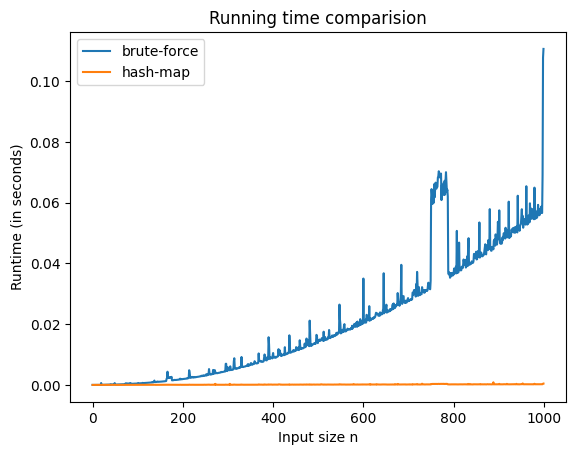

In [ ]:
# two sum brute-force solution

def twoSum1(nums, target):
    l = len(nums)
    for i in range(l-1):
        for j in range(i+1, l):
            #print('Here are the indices I am checking right now..')
            #print(i,j)
            if nums[i] + nums[j] == target:
                return [i, j]



nmax = 1000
times_twosum1 = []
times_twosum = []

for n in range(nmax):
    nums = [i for i in range(n)]
    target = 2*n

    tic = time.time()
    twoSum1(nums, target)
    toc = time.time()
    times_twosum1.append(toc-tic)

    tic = time.time()
    twoSum2(nums, target)
    toc = time.time()
    times_twosum.append(toc-tic)

plt.figure()
plt.plot(times_twosum1)
plt.plot(times_twosum)

plt.legend(['brute-force', 'hash-map'])
plt.xlabel('Input size n')
plt.ylabel('Runtime (in seconds)')
plt.title('Running time comparision')

## Logarithmic time

### Binary search

Leetcode binary search:

https://leetcode.com/problems/binary-search/description/


In [ ]:
# brute-force solution

def search(nums, target):
    for i in range(len(nums)):
        if nums[i] == target:
            return i
    return -1

nums = [-1,0,3,5,9,12]
target = 9
print(search(nums, target))

4


In [ ]:
# binary search

def bsearch(nums, target):
    start = 0
    end = len(nums) - 1

    while start <= end:
        mid = (start + end) // 2    # integer division
        if nums[mid] == target:
            return mid
        elif nums[mid] < target:
            start = mid + 1
        else:
            end = mid - 1
    return -1

nums = [-1,0,3,5,9,12]
target = 9
print(search(nums, target))

4


Text(0.5, 1.0, 'Running time comparision')

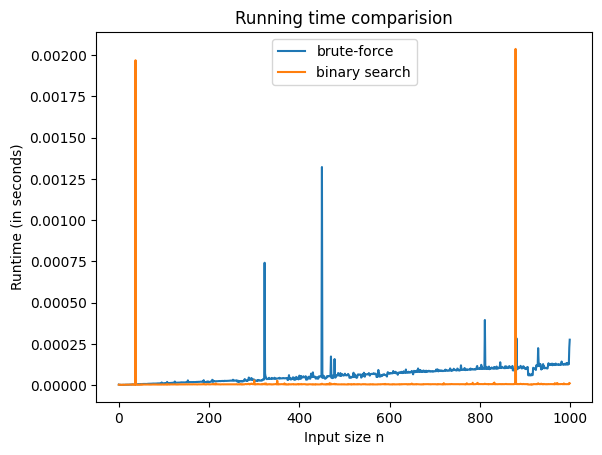

In [ ]:
nmax = 1000

times_search = []
times_bsearch = []

for n in range(nmax):
    nums = [i for i in range(5*n)]
    target = n-4

    tic = time.time()
    search(nums, target)
    toc = time.time()
    times_search.append(toc-tic)

    tic = time.time()
    bsearch(nums, target)
    toc = time.time()
    times_bsearch.append(toc-tic)

plt.figure()
plt.plot(times_search)
plt.plot(times_bsearch)

plt.legend(['brute-force', 'binary search'])
plt.xlabel('Input size n')
plt.ylabel('Runtime (in seconds)')
plt.title('Running time comparision')


### Capacity to ship packages

https://leetcode.com/problems/capacity-to-ship-packages-within-d-days/description/

In [ ]:
def shipWithinDays(weights, days):

    def feasible(capacity):
        cur_days = 1
        cur_weight = 0
        for w in weights:
            cur_weight = cur_weight + w
            if cur_weight > capacity:
                cur_weight = w
                cur_days += 1
                if cur_days > days:
                    return False
        return True


    start, end = max(weights), sum(weights)
    out = end

    while start <= end:
        mid = (start + end) // 2    # integer division
        if feasible(mid):
            end = mid - 1
            out = min(mid, out)
        else:
            start = mid + 1
    return out

weights = [1,2,3,4,5,6,7,8,9,10]
days = 5
print(shipWithinDays(weights, days))

15


## Quasilinear time

### Merge sort

In [ ]:
# merge sort

def merge_sort(nums):
    l = len(nums)
    if l <= 1:
        return nums

    # Divide the array into two halves
    mid = len(nums) // 2
    left_half = nums[:mid]
    right_half = nums[mid:]

    # Recursively sort the two halves
    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    # Merge the sorted halves
    return merge(left_half, right_half)

def merge(left, right):
    merged = []
    left_index = 0
    right_index = 0

    # Merge the two sorted lists
    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1

    # Add remaining elements from left and right subarrays
    merged.extend(left[left_index:])
    merged.extend(right[right_index:])

    return merged

# Example usage:
nums = [12, 11, 13, 5, 6, 7]
print(merge_sort(nums))

print(merge([1, 3, 5], [1, 4, 6, 10]))


[5, 6, 7, 11, 12, 13]
[1, 1, 3, 4, 5, 6, 10]


## Exponential time

### Fibonacci number

https://leetcode.com/problems/fibonacci-number/description/

In [ ]:
# exponential time solution to the nth fibonacci number problem

def fib1(n):
    print('Entering fib1 with n =', n)
    if n <= 1:
        #print('Reached base case with n =', n)
        return n
    else:
        print('Adding the results for', n-1, 'and', n-2)
        return fib1(n - 1) + fib1(n - 2)

print(fib1(10))

Entering fib1 with n = 10
Adding the results for 9 and 8
Entering fib1 with n = 9
Adding the results for 8 and 7
Entering fib1 with n = 8
Adding the results for 7 and 6
Entering fib1 with n = 7
Adding the results for 6 and 5
Entering fib1 with n = 6
Adding the results for 5 and 4
Entering fib1 with n = 5
Adding the results for 4 and 3
Entering fib1 with n = 4
Adding the results for 3 and 2
Entering fib1 with n = 3
Adding the results for 2 and 1
Entering fib1 with n = 2
Adding the results for 1 and 0
Entering fib1 with n = 1
Entering fib1 with n = 0
Entering fib1 with n = 1
Entering fib1 with n = 2
Adding the results for 1 and 0
Entering fib1 with n = 1
Entering fib1 with n = 0
Entering fib1 with n = 3
Adding the results for 2 and 1
Entering fib1 with n = 2
Adding the results for 1 and 0
Entering fib1 with n = 1
Entering fib1 with n = 0
Entering fib1 with n = 1
Entering fib1 with n = 4
Adding the results for 3 and 2
Entering fib1 with n = 3
Adding the results for 2 and 1
Entering fib1 w

In [ ]:
# linear time solution using memoization


fmap = {}
fmap[0] = 0
fmap[1] = 1

def fib2(n):
    print('Entering fib2 with n =', n)

    if n not in fmap:
        print('Adding the results for', n-1, 'and', n-2)
        fmap[n] = fib2(n-1) + fib2(n-2)

    return fmap[n]

print(fib2(10))

Entering fib2 with n = 10
Adding the results for 9 and 8
Entering fib2 with n = 9
Adding the results for 8 and 7
Entering fib2 with n = 8
Adding the results for 7 and 6
Entering fib2 with n = 7
Adding the results for 6 and 5
Entering fib2 with n = 6
Adding the results for 5 and 4
Entering fib2 with n = 5
Adding the results for 4 and 3
Entering fib2 with n = 4
Adding the results for 3 and 2
Entering fib2 with n = 3
Adding the results for 2 and 1
Entering fib2 with n = 2
Adding the results for 1 and 0
Entering fib2 with n = 1
Entering fib2 with n = 0
Entering fib2 with n = 1
Entering fib2 with n = 2
Entering fib2 with n = 3
Entering fib2 with n = 4
Entering fib2 with n = 5
Entering fib2 with n = 6
Entering fib2 with n = 7
Entering fib2 with n = 8
55


In [ ]:
# linear time solution using bottom-up approach

def fib3(n):
    print('Entering fib2 with n =', n)
    if n <= 1:
        #print('Reached base case with n =', n)
        return n
    else:
        fmap = {}
        fmap[0] = 0
        fmap[1] = 1
        for i in range(2, n+1):
            print('Adding the results for', i-1, 'and', i-2)
            fmap[i] = fmap[i-1] + fmap[i-2]
        return fmap[n]

print(fib3(10))

Entering fib2 with n = 10
Adding the results for 1 and 0
Adding the results for 2 and 1
Adding the results for 3 and 2
Adding the results for 4 and 3
Adding the results for 5 and 4
Adding the results for 6 and 5
Adding the results for 7 and 6
Adding the results for 8 and 7
Adding the results for 9 and 8
55


### Climbing stairs

https://leetcode.com/problems/climbing-stairs/description/

In [ ]:
# exponential time solution

def climbStairs1(n):
    if n <= 2:
        return n
    else:
        return climbStairs1(n - 1) + climbStairs1(n - 2)

print(climbStairs1(10))

89


In [ ]:
# linear time solution using bottom-up approach

def climbStairs2(n):
    if n <= 2:
        return n
    else:
        cmap = {}
        cmap[1] = 1
        cmap[2] = 2
        for i in range(3, n+1):
            cmap[i] = cmap[i-1] + cmap[i-2]
        return cmap[n]

print(climbStairs2(10))

89


### Coin change

https://leetcode.com/problems/coin-change/description/


In [ ]:
# bottom up solution

def coinChange(coins, amount):
    dpmap = [amount + 100] * (amount+1)         # initialize with a very high amount
    dpmap[0] = 0                                # base case

    for cur_amount in range(1, amount+1):
        for coin in coins:
            if cur_amount >= coin:
                dpmap[cur_amount] = min(dpmap[cur_amount], dpmap[cur_amount-coin] + 1)
    #print(dpmap)
    return -1 if dpmap[amount] == amount + 100 else dpmap[amount]

coins = [1, 3, 4, 5]
amount = 7
print(coinChange(coins, amount))

2


## Factorial time

### Permutations

https://leetcode.com/problems/permutations/description/

In [ ]:

def permute(nums):
    def backtrack(remaining_nums, path):
        print('Entering backtrack with path =', path, 'and remaining nums =', remaining_nums)
        if not remaining_nums:
            result.append(path)
            return
        for i in range(len(remaining_nums)):
            backtrack(remaining_nums[:i] + remaining_nums[i+1:], path + [remaining_nums[i]])
    result = []
    backtrack(nums, [])
    return result

nums = [1,2,3]
print(permute(nums))

Entering backtrack with path = [] and remaining nums = [1, 2, 3]
Entering backtrack with path = [1] and remaining nums = [2, 3]
Entering backtrack with path = [1, 2] and remaining nums = [3]
Entering backtrack with path = [1, 2, 3] and remaining nums = []
Entering backtrack with path = [1, 3] and remaining nums = [2]
Entering backtrack with path = [1, 3, 2] and remaining nums = []
Entering backtrack with path = [2] and remaining nums = [1, 3]
Entering backtrack with path = [2, 1] and remaining nums = [3]
Entering backtrack with path = [2, 1, 3] and remaining nums = []
Entering backtrack with path = [2, 3] and remaining nums = [1]
Entering backtrack with path = [2, 3, 1] and remaining nums = []
Entering backtrack with path = [3] and remaining nums = [1, 2]
Entering backtrack with path = [3, 1] and remaining nums = [2]
Entering backtrack with path = [3, 1, 2] and remaining nums = []
Entering backtrack with path = [3, 2] and remaining nums = [1]
Entering backtrack with path = [3, 2, 1] an